# Деревья решений

### Columns:

Education    -   образовательная квалификация сотрудников, включая степень, учебное заведение и область обучения.

Joining Year  -  год, когда каждый сотрудник присоединился к компании, с указанием стажа работы.

City         -   место или город, где проживает или работает каждый сотрудник.

Payment Tier -   категоризация сотрудников по разным уровням заработной платы.

Age       -      возраст каждого сотрудника, предоставляющий демографическую информацию.

Gender    -      гендерная идентичность сотрудников, способствующая анализу разнообразия.

Ever Benched -   указывает, находился ли сотрудник когда-либо временно без назначенной работы.

Experience in 
Current Domain - количество лет опыта сотрудников в текущей области.

Leave or Not  -  целевой столбец

In [1]:
import pandas as pd
import seaborn as sns

df_table = pd.read_csv('Employee.csv',sep=",")  
df_table

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for i in df_table.select_dtypes(include=['object']).columns:
    df_table[i] = le.fit_transform(df_table[i])
df_table

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


### Проверка корреляции элементов

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

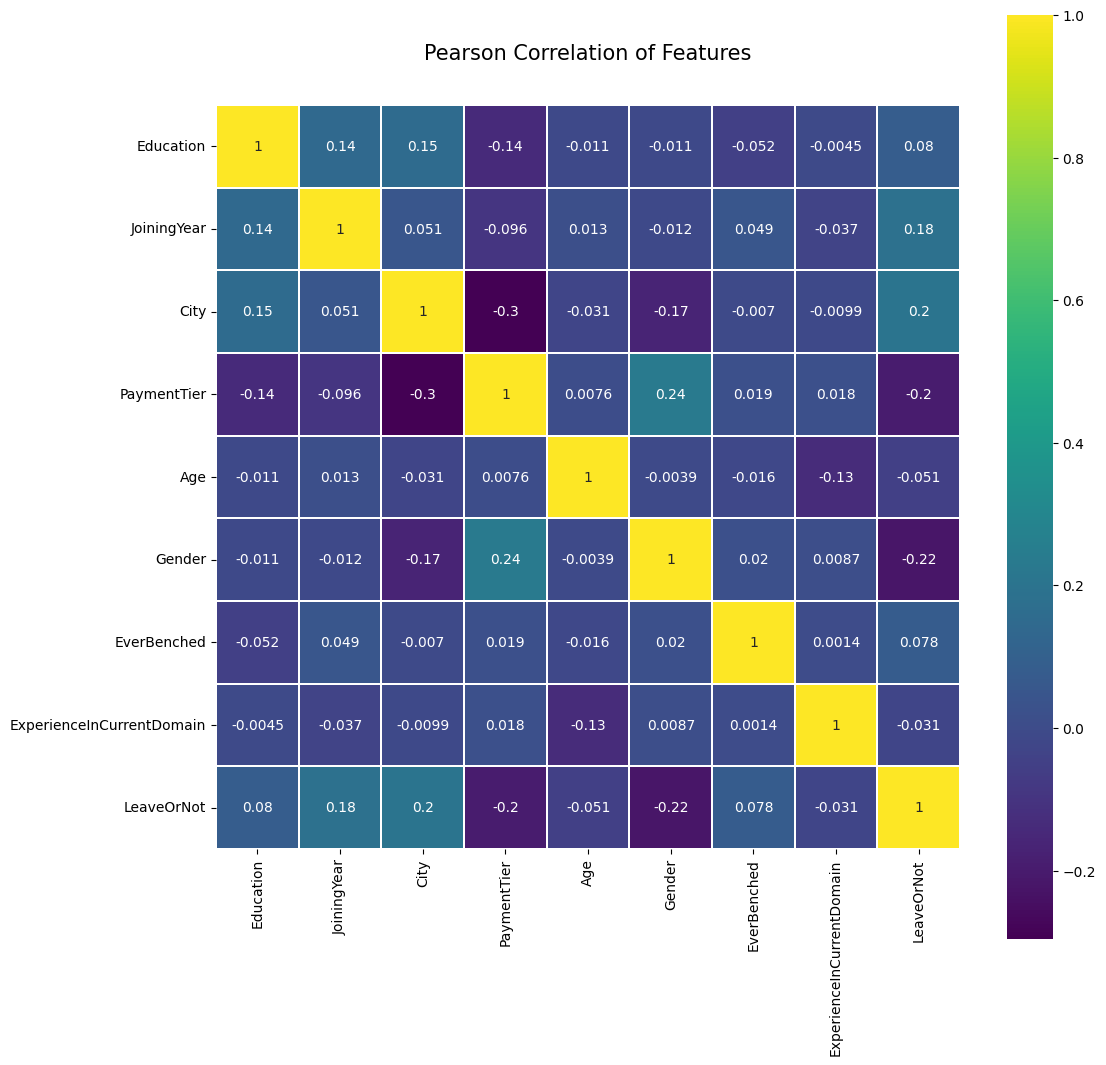

In [ ]:
import matplotlib.pyplot as plt


colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_table.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Разделяем на обучающую и тестовую выборки

In [ ]:

from sklearn.model_selection import train_test_split


X = df_table.drop(columns = ['LeaveOrNot'])
Y = df_table['LeaveOrNot']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.8, 
                                                    random_state=42,
                                                    stratify=Y)

X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4097,0,2012,1,3,38,0,0,1
1694,0,2018,0,3,26,1,0,4
2659,0,2016,2,3,27,1,0,5
3860,0,2016,0,3,36,1,0,4
1250,0,2017,0,3,27,1,1,5
...,...,...,...,...,...,...,...,...
2699,1,2017,1,3,27,1,0,5
1847,0,2016,0,3,26,1,1,4
2955,1,2015,2,3,26,1,0,4
2148,0,2014,0,3,26,1,0,4


In [ ]:
Y_train

4097    0
1694    1
2659    0
3860    0
1250    0
       ..
2699    1
1847    0
2955    1
2148    0
4150    0
Name: LeaveOrNot, Length: 3722, dtype: int64

In [ ]:
X_test

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
832,1,2017,1,2,27,0,0,5
3223,0,2014,0,3,36,0,0,3
4344,0,2012,0,3,31,1,0,3
3746,0,2015,1,3,31,1,0,0
1019,0,2013,0,3,27,0,0,5
...,...,...,...,...,...,...,...,...
1877,0,2012,2,3,24,0,0,2
179,0,2012,0,3,27,1,0,5
1774,1,2014,1,1,25,0,0,3
1134,0,2014,2,3,27,1,0,5


In [ ]:
Y_test

832     1
3223    0
4344    0
3746    0
1019    0
       ..
1877    1
179     1
1774    0
1134    1
3975    1
Name: LeaveOrNot, Length: 931, dtype: int64

## Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion='entropy', max_depth = 8).fit(X_train, Y_train)

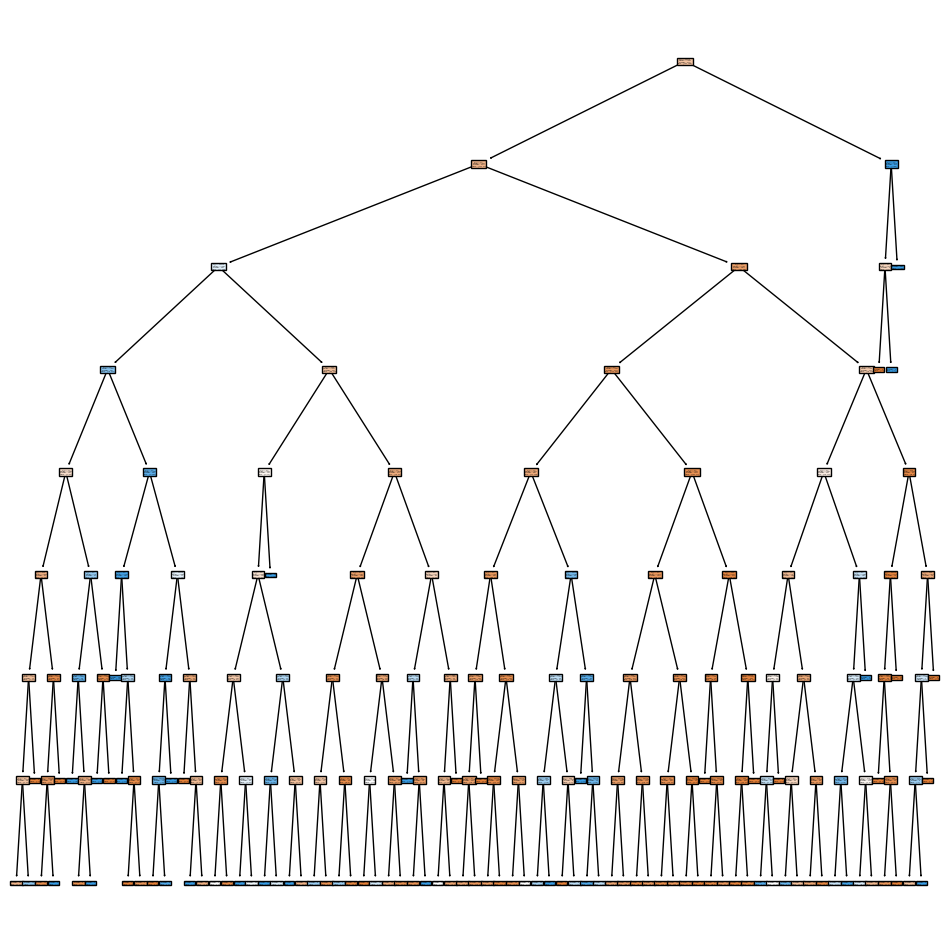

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plot_tree(model, filled=True)
plt.savefig('answer.png', dpi = 1000)

### Матрица несоответствий

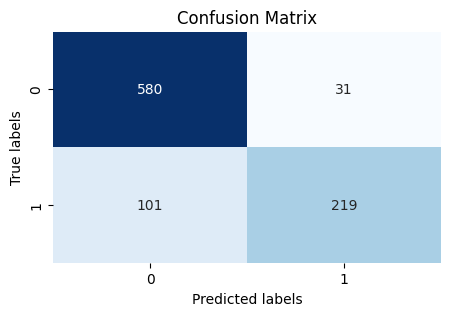

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test))

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Добавляем подписи и заголовок
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Оценка качества модели

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, model.predict(X_test))

0.8582169709989259

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Count'>

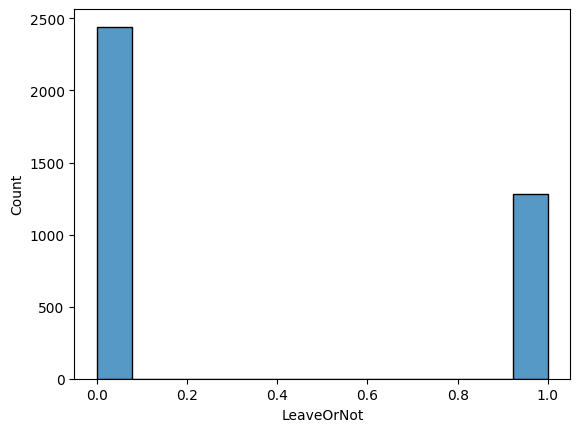

In [ ]:
sns.histplot(Y_train)

### Определяем оптимальную глубину дерева

In [ ]:
depth_range = range(1, 20)

train_acc = []
test_acc = []

for d in depth_range:
    # Обучаем модель на тестовой выборке
    tree_model = DecisionTreeClassifier(max_depth = d)
    tree_model.fit(X_train, Y_train)

    # Предсказывание значений на обучающей и тестовой выборке
    pred_result_train = tree_model.predict(X_train)
    pred_result_test = tree_model.predict(X_test)

    # Оценка качества модели на обучающей и тестовой выборке
    train_acc.append(accuracy_score(Y_train, pred_result_train))
    test_acc.append(accuracy_score(Y_test, pred_result_test))

In [ ]:
def plot_accs(*funs):
  plt.figure(figsize=(12, 8))
  for i in funs:
    plt.plot(range(1, len(i) +1), i)
  plt.xlabel("Iteration")
  plt.ylabel("Acc")
  plt.show()

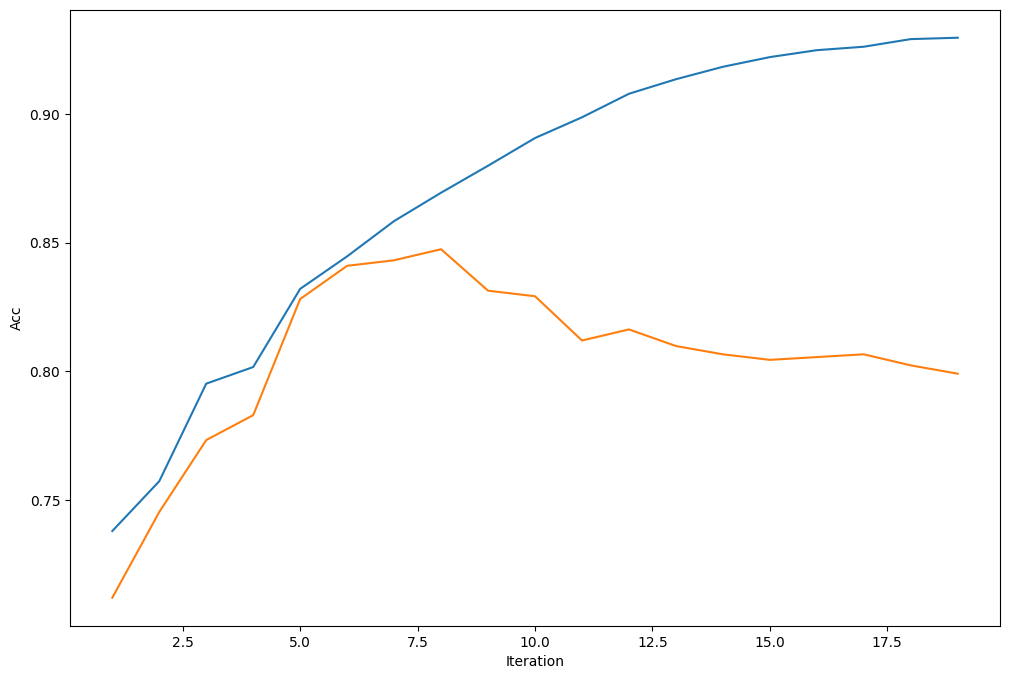

In [ ]:
plot_accs(train_acc, test_acc)

## Случайные леса

In [ ]:
tree_model = DecisionTreeClassifier(max_depth = 7)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
Y_pred = tree_model.predict(X_test)

In [ ]:
accuracy_score(Y_pred, Y_test)

0.8442534908700322

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=2)

In [ ]:
forest_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=2)

In [ ]:
Y_pred = forest_model.predict(X_test)

In [ ]:
accuracy_score(Y_pred, Y_test)

0.8442534908700322

## Стэкинг

### Линейный классификатор

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=200).fit(X_train, Y_train)
pred_log = log.predict(X_test)

In [ ]:
accuracy_score(pred_log, Y_test)

0.7185821697099892

### Наивный баейсовский классификатор

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
pred_gnb = gnb.predict(X_test)

In [ ]:
accuracy_score(pred_gnb, Y_test)

0.6874328678839957

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
pred_knn = knn.predict(X_test)

In [ ]:
accuracy_score(pred_knn, Y_test)

0.7841031149301826

In [ ]:
estimators = [('log', log), ('bayes', gnb), ('knn', knn)]

In [ ]:
estimators = [('for', forest_model), ('tree', tree_model)]

In [ ]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, Y_train)
clf_pred = clf.predict(X_test)

In [ ]:
accuracy_score(clf_pred, Y_test)

0.7851772287862513

## Бустинг

In [ ]:
from catboost import CatBoostClassifier


model_boost = CatBoostClassifier(iterations=4, depth=2, learning_rate=1, loss_function='Logloss', verbose=True)

In [ ]:
model_boost.fit(X_train, Y_train)

0:	learn: 0.5138528	total: 129ms	remaining: 388ms
1:	learn: 0.4701345	total: 131ms	remaining: 131ms
2:	learn: 0.4563820	total: 131ms	remaining: 43.7ms
3:	learn: 0.4472724	total: 132ms	remaining: 0us


In [ ]:
Y_pred = model_boost.predict(X_test)

In [ ]:
accuracy_score(Y_pred, Y_test)

0.8238453276047261